# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# 1.1 Dataset from kaggle

https://www.kaggle.com/datasets/brandmustafa/wine-quality-classification-dataset/data

## Examining the dataset

In [3]:
df = pd.read_csv('wine_dataset.csv')

df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,0
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,0
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,0
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,0


In [4]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  targe

In [6]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [7]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [8]:
df['target'].unique()
df['target'].value_counts()


target
1    71
0    59
2    48
Name: count, dtype: int64

In [9]:
df['target'].value_counts(normalize=True)


target
1    0.398876
0    0.331461
2    0.269663
Name: proportion, dtype: float64

In [10]:
df.describe().loc[['min','max']]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
min,11.03,0.74,1.36,10.6,70.0,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.0,0.0
max,14.83,5.80,3.23,30.0,162.0,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.0,2.0


### Interpretation / Explanation

Ennustetaan viinin laatua jonka luokka on "target", sillä on 3 luokkaa (0,1,2).

Kaikki ominaisuudet on numeerisia, eli sopii hyvin SVM ja kNN metodeille.

Datassa ei ole puuttuvia arvoja, arvojen vaihtelu väli on suuri, joten data tarvitsee skaalata jotta saadaan parempi suorituskyky.

### Visualization

Kokeillaan pari plottausta, mutta otetaan subsetti jotta pystyy edes jotenkin hahmottamaan mitä tapahtuu. Napataan kolumnit: malic_acid, alcalinity_of_ash, flavanoids, color_intensity, target

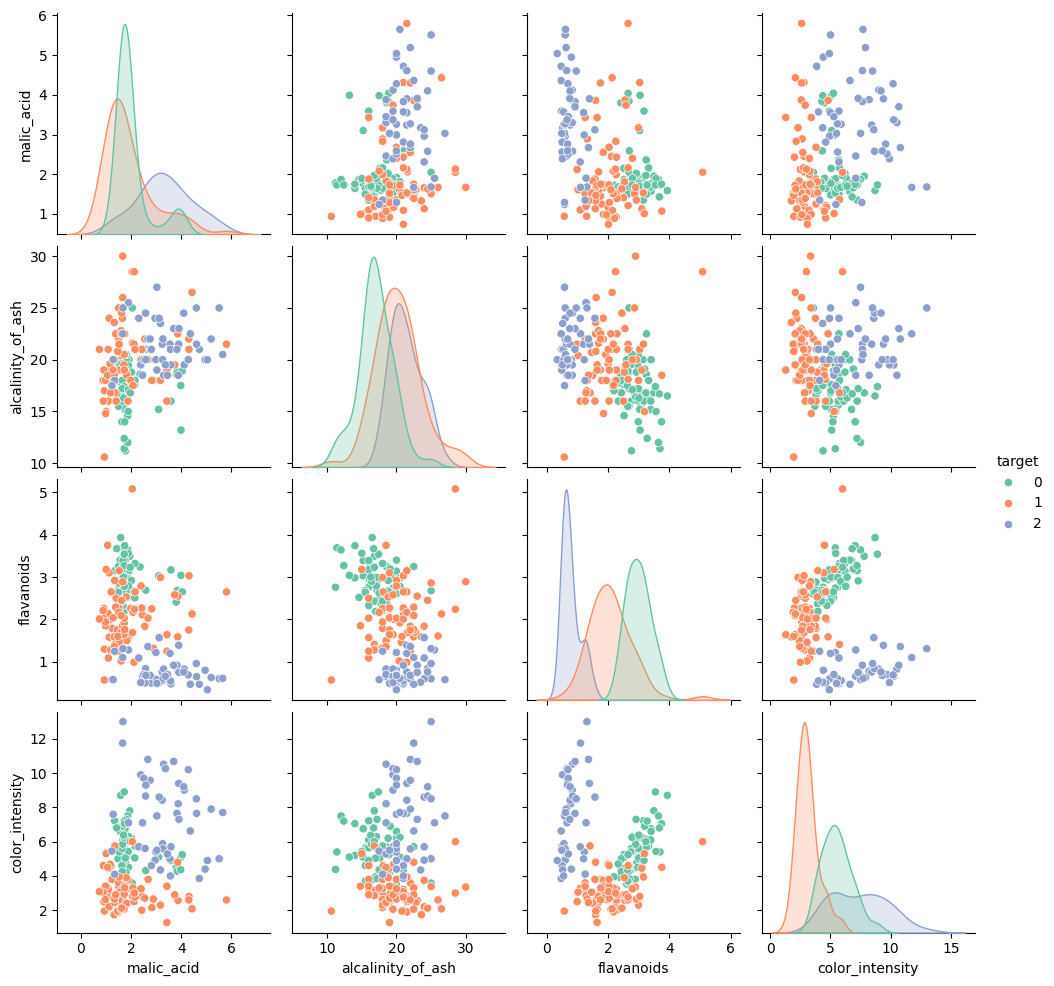

In [11]:
subset_df = ['malic_acid', 'alcalinity_of_ash', 'flavanoids', 'color_intensity', 'target']

sns.pairplot(data=df[subset_df], hue='target', palette='Set2', diag_kind='kde');

Scatterplotti Ash vs Color Intensity

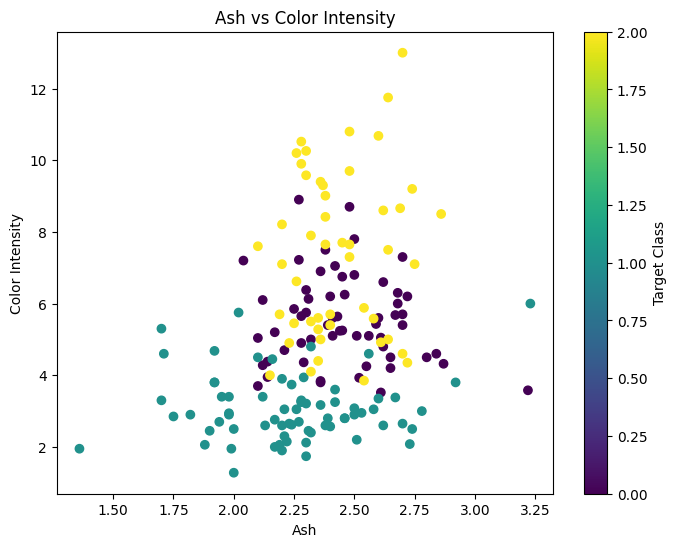

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df['ash'], df['color_intensity'], c=df['target'], cmap='viridis')
plt.xlabel('Ash')
plt.ylabel('Color Intensity')
plt.title('Ash vs Color Intensity')
plt.colorbar(label='Target Class');

Scatterplot Proline vs Flavanoids

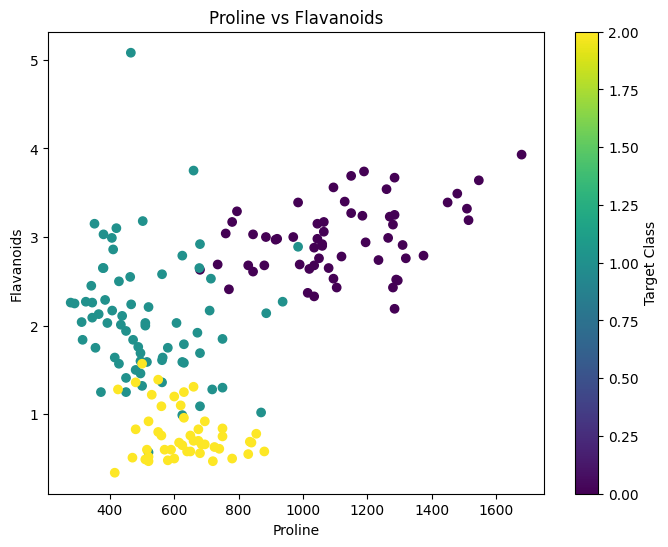

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(df['proline'], df['flavanoids'], c=df['target'], cmap='viridis')
plt.xlabel('Proline')
plt.ylabel('Flavanoids')
plt.title('Proline vs Flavanoids')
plt.colorbar(label='Target Class');

# 1.2 First SVM run

## Train & Test Non-scaled

In [14]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=420)

In [15]:
model_svm=SVC()
model_svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Preditions from the unscaled model

In [ ]:
pred_svm=model_svm.predict(X_test)
print(confusion_matrix(y_test,pred_svm))
print(classification_report(y_test, pred_svm))
# Tuon accuracy scoren näkee tuosta classification reportista, eli ei tarvi tuota accuracy_score funktionia käyttää
# print(accuracy_score(y_test, pred_svm)) 

[[12  0  0]
 [ 2 10  2]
 [ 1  6  3]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       0.62      0.71      0.67        14
           2       0.60      0.30      0.40        10

    accuracy                           0.69        36
   macro avg       0.67      0.67      0.65        36
weighted avg       0.68      0.69      0.67        36

0.6944444444444444


### Interperation / Explanation

Mallin tarkkuus on 69%

Kolmas luokka (target = 2) on väärin luokiteltu 40% ajasta, SVM hylkää pienet vaihteluvälit oletuksena.

# 1.3 Listing of 2 more interresting use cases for SVM algorithm

# 2.1 More advanced train test with SVMs - effect of standard scaler

## Train & Test Scaled

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
model_svm_scaled = SVC()
model_svm_scaled.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Preditions from the scaled model

In [19]:

pred_svm_scaled = model_svm_scaled.predict(X_test_scaled)
print(confusion_matrix(y_test, pred_svm_scaled))
print(classification_report(y_test, pred_svm_scaled))


[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### Cross validation

In [20]:
scores_svm = cross_val_score(SVC(), scaler.fit_transform(X), y, cv=5)
print("5-fold CV scores:", scores_svm)
print("Mean CV accuracy:", np.mean(scores_svm))

5-fold CV scores: [1.         0.97222222 0.94444444 1.         1.        ]
Mean CV accuracy: 0.9833333333333334


### Interperation / Explanation

Tarkkuus nousee 100%

Skaalaus normalisoi ominaisuuksien vaikutusta, luokkien (target) rajat erotottuvat selvästi

# 2.2 Studying confusion matrices and interpret them

In [21]:
print("=== Confusion Matrices Comparison ===")
print("Non-scaled SVM:")
print(confusion_matrix(y_test, pred_svm))
print("Scaled SVM:")
print(confusion_matrix(y_test, pred_svm_scaled))

=== Confusion Matrices Comparison ===
Non-scaled SVM:
[[12  0  0]
 [ 2 10  2]
 [ 1  6  3]]
Scaled SVM:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


## Consfusion matriisien tarkastelu

Skaalaamattomassa matriissa näkee kuinka luokka 3 (target = 2) luokitellaan väärin huomattavan usein

Skaalatusta matriisista näkee, että virhe luokitteluja ei ole

Erittäin selvä havainnollistus miksi skaalausta tarvitaan

# 2.3 Compare SVM results with kNN results

## kNN unscaled

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

pred_knn = knn.predict(X_test)

print("=== kNN on unscaled data ===")
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

=== kNN on unscaled data ===
[[12  0  0]
 [ 2  9  3]
 [ 1  6  3]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       0.60      0.64      0.62        14
           2       0.50      0.30      0.38        10

    accuracy                           0.67        36
   macro avg       0.63      0.65      0.63        36
weighted avg       0.64      0.67      0.64        36



## kNN scaled

In [23]:
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

pred_knn_scaled = knn_scaled.predict(X_test_scaled)

print("=== kNN on scaled data ===")
print(confusion_matrix(y_test, pred_knn_scaled))
print(classification_report(y_test, pred_knn_scaled))

=== kNN on scaled data ===
[[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



## kNN Cross validation

In [24]:
scores_knn = cross_val_score(KNeighborsClassifier(n_neighbors=5), scaler.fit_transform(X), y, cv=5)
print("5-fold CV scores for kNN:", scores_knn)
print("Mean CV accuracy for kNN:", np.mean(scores_knn))

5-fold CV scores for kNN: [0.94444444 0.94444444 0.97222222 1.         0.91428571]
Mean CV accuracy for kNN: 0.9550793650793651


## Interpretation & Comparison

In [34]:
print("=== Confusion Matrices Summary ===\n")

print("SVM Non-scaled:")
print(confusion_matrix(y_test, pred_svm))
print(f"Accuracy score: {accuracy_score(y_test, pred_svm):.2f}", "\n") 

print("kNN Non-scaled:")
print(confusion_matrix(y_test, pred_knn))
print(f"Accuracy score: {accuracy_score(y_test, pred_knn):.2f}", "\n") 

print("SVM Scaled:")
print(confusion_matrix(y_test, pred_svm_scaled))
print(f"Accuracy score: {accuracy_score(y_test, pred_svm_scaled):.2f}", "\n") 

print("kNN Scaled:")
print(confusion_matrix(y_test, pred_knn_scaled))
print(f"Accuracy score: {accuracy_score(y_test, pred_knn_scaled):.2f}", "\n")

=== Confusion Matrices Summary ===

SVM Non-scaled:
[[12  0  0]
 [ 2 10  2]
 [ 1  6  3]]
Accuracy score: 0.69 

kNN Non-scaled:
[[12  0  0]
 [ 2  9  3]
 [ 1  6  3]]
Accuracy score: 0.67 

SVM Scaled:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
Accuracy score: 1.00 

kNN Scaled:
[[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]
Accuracy score: 0.97 



Molemmat kNN ja SVM hyötyvät skaalauksesta, SVM hieman paremmin, sillä kNN on herkkä pienen k ja ominaisuuksien arvoille